In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
n_samples = 100
n_features = 8
n_classes = 4

# Generate dataset of 100 samples, 8 input features ande 4 output classes
X, y = make_classification(
    n_samples=n_samples,  # row number
    n_features=n_features, # feature numbers
    n_informative=5, # feature numbers
    n_classes = n_classes, # The number of classes
    random_state = 42 # random seed
)

#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

# One-hot encode training output
onehot_encoder = OneHotEncoder(sparse=False)

y_train = y_train.reshape(len(y_train), 1)
y_train_encoded = onehot_encoder.fit_transform(y_train)

# Print training data
for i in range(10):
    print('Training data features and output:')
    print(X_train[i])
    print(y_train_encoded[i])

Training data features and output:
[ 3.08448642 -1.87655948  1.81561548 -0.08618734 -2.15474615  0.38361395
 -0.54035823 -1.22510618]
[0. 0. 0. 1.]
Training data features and output:
[-2.31871435  1.44335156 -1.19982848  0.63955514  1.81807044 -0.33571507
  0.11645124  0.55843745]
[0. 1. 0. 0.]
Training data features and output:
[ 1.08140436 -0.1762244   0.28882915 -1.55961269  0.92002655 -0.79843905
  1.64549034 -1.30835807]
[0. 0. 0. 1.]
Training data features and output:
[ 3.19468955 -2.03654447  0.39021926 -2.05858449  1.10947028 -2.36972141
  2.55547839 -2.74463759]
[0. 0. 0. 1.]
Training data features and output:
[ 1.50123307 -1.07571468  2.50804888  0.35349917 -4.35769974  0.11960567
 -1.1650881   1.1151211 ]
[0. 0. 1. 0.]
Training data features and output:
[-0.27875337  1.73880595 -1.52790023 -0.26438952  2.11695607  0.55186366
 -2.0614334  -0.75324988]
[0. 0. 1. 0.]
Training data features and output:
[ 2.08969416 -1.76113608 -0.37868144 -0.48678884  2.86610283 -1.52401524
  2.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 8
        hiddenLayerNeurons = 10
        outLayerNeurons = 4

        self.learning_rate = 0.2
        # YOUR CODE HERE
        # Initialize weight matrix for hidden and output layers
        self.W_HI_1 = np.random.randn(inputLayerNeurons, hiddenLayerNeurons) # Weight matrix from input to first hidden layer
        self.W_O_1 = np.random.randn(hiddenLayerNeurons, outLayerNeurons) # Weight matrix from first hidden layer to output layer

    def sigmoid(self, x, der=False):
        if der == True:
            # Derivative of activation function
            return x * (1-x)
        else:
            # Activation function
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        # YOUR CODE HERE
        # Implement feedforward output for hidden and output layers
        hidden_input_1 = np.dot(X, self.W_HI_1)
        self.hidden_output_1 = self.sigmoid(hidden_input_1) # Output of first hidden layer

        output_input_1 = np.dot(self.hidden_output_1, self.W_O_1)
        pred = self.sigmoid(output_input_1) # Output of output layer

        return pred

    def backPropagation(self, X, Y, pred):
        # YOUR CODE HERE
        # Implement backpropogation steps for hidden and output layers
        output_error = Y - pred  # output error
        output_delta = output_error * self.sigmoid(pred, der=True) # output delta
        # Compute hidden layer errors and deltas
        # update weights of hidden and output layers

        # Backpropagate the error to the hidden layer
        hidden_error = output_delta.dot(self.W_O_1.T)
        hidden_delta = hidden_error * self.sigmoid(self.hidden_output_1, der=True)

        # Update weights
        self.W_O_1 += self.hidden_output_1.T.dot(output_delta) * self.learning_rate
        self.W_HI_1 += X.T.dot(hidden_delta) * self.learning_rate

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

Error on training data:


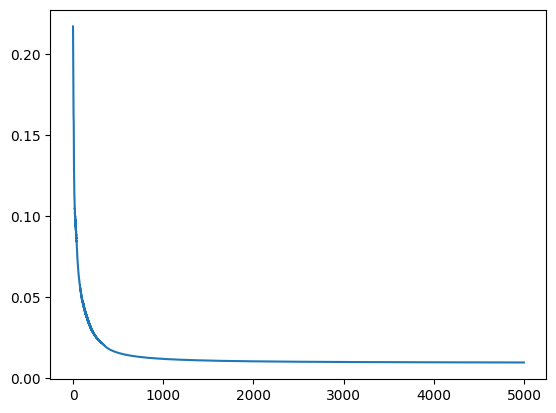

In [4]:
NN = NeuralNetwork()
# Train model for 5000 iterations and plot loss
err = []
for i in range(5000):
    NN.train(X_train,y_train_encoded)
    err.append(np.mean(np.square(y_train_encoded - NN.feedForward(X_train))))

print("Error on training data:")
plt.plot(err)

In [5]:
# YOUR CODE HERE
# Run trained model on test data
y_pred = NN.feedForward(X_test)
print("Model output:")
print(y_pred)

Model output:
[[5.27227333e-05 3.54220360e-08 9.66779706e-01 1.38592913e-02]
 [8.39129551e-02 1.01771325e-02 7.42663370e-12 9.99852160e-01]
 [2.23004797e-04 9.23029458e-01 2.55946360e-03 2.09028804e-02]
 [6.19179701e-02 8.00289366e-01 4.84027005e-09 1.06658630e-03]
 [5.17248659e-06 4.08036422e-06 9.83279388e-01 1.85864315e-01]
 [4.14425917e-01 1.49508489e-10 8.18763285e-04 3.40355855e-01]
 [8.61010996e-01 5.48563621e-03 1.70001164e-04 7.15860841e-05]
 [1.82778599e-03 9.99998960e-01 2.43028214e-09 1.39510435e-01]
 [6.84545712e-01 1.37212387e-09 9.99484813e-01 4.43274393e-04]
 [2.83877194e-02 2.21910751e-06 5.57863451e-03 2.02652122e-02]
 [9.99694435e-01 1.66474312e-02 2.23219641e-06 1.44364089e-03]
 [9.93478465e-01 1.34812974e-08 2.21121930e-07 1.60198602e-03]
 [2.06114393e-07 1.14568720e-06 1.25476575e-02 9.95616500e-01]
 [5.31996614e-05 9.99984745e-01 1.91759848e-02 5.54477842e-09]
 [6.50079771e-11 9.99974233e-01 2.05489026e-01 1.28391196e-03]
 [9.70074048e-02 5.92211795e-01 9.9487635

In [6]:
# One-hot encoded predictions

new_y_pred = np.zeros(y_pred.shape)  # our zeros and ones will go here
max_y_pred = np.argmax(y_pred, axis=1)
for i in range(len(y_pred)):
    new_y_pred[i][max_y_pred[i]] = 1

print("One-hot encoded output:")
print(new_y_pred)

One-hot encoded output:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [7]:
# Obtain predicted output values
y_pred = new_y_pred.argmax(axis=1)
print("Predicted values: ", y_pred)

Predicted values:  [2 3 1 1 2 0 0 1 2 0 0 0 3 1 1 2 0 1 3 1]


In [8]:
# Print true output values
y_test = y_test.flatten()
print("Actual values: ", y_test)

Actual values:  [3 0 0 1 2 0 2 3 2 0 1 0 3 1 1 2 0 2 0 1]


In [9]:
# Obtain accuracy on test data
def accuracy(y_pred, y_true):
    acc = y_pred == y_true
    print("Predictions: ", acc)
    return acc.mean()
print("Accuracy: ", accuracy(y_pred,y_test))

Predictions:  [False False False  True  True  True False False  True  True False  True
  True  True  True  True  True False False  True]
Accuracy:  0.6


In [10]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(np.array(y_test), np.array((y_pred)))
# Print confusion matrix
print("Confusion matrix: \n", confusion_matrix)

Confusion matrix: 
 [[4 1 0 2]
 [1 4 0 0]
 [1 1 3 0]
 [0 1 1 1]]
